# Task 1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# -----------------------------
# Load Dataset
# -----------------------------
df = pd.read_csv("heart_disease.csv")
df.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


In [4]:
df.info()
df.describe()

missing_vals=df.isnull().sum()
dup_vals=df.duplicated().sum()

print("Missing values:\n",missing_vals)
print("Duplicate values: ",dup_vals)
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

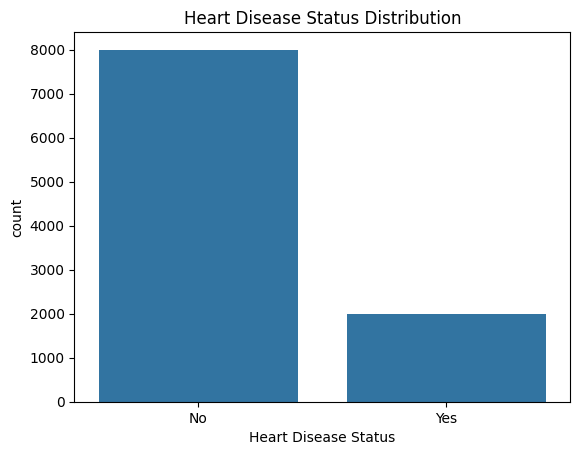

In [6]:
plt.figure()
sns.countplot(x=df['Heart Disease Status'])
plt.title("Heart Disease Status Distribution")
plt.show()

Correlation Matrix:
                           Age  Blood Pressure  Cholesterol Level       BMI  \
Age                  1.000000       -0.020781           0.011371  0.011229   
Blood Pressure      -0.020781        1.000000          -0.012026  0.005405   
Cholesterol Level    0.011371       -0.012026           1.000000  0.022002   
BMI                  0.011229        0.005405           0.022002  1.000000   
Sleep Hours          0.002481        0.001153           0.011195 -0.001029   
Triglyceride Level  -0.008112        0.008108           0.001451  0.005354   
Fasting Blood Sugar -0.006019       -0.011991           0.000060  0.006437   
CRP Level            0.008779       -0.010137          -0.017564 -0.016525   
Homocysteine Level  -0.007084       -0.003244          -0.006285  0.003583   

                     Sleep Hours  Triglyceride Level  Fasting Blood Sugar  \
Age                     0.002481           -0.008112            -0.006019   
Blood Pressure          0.001153            

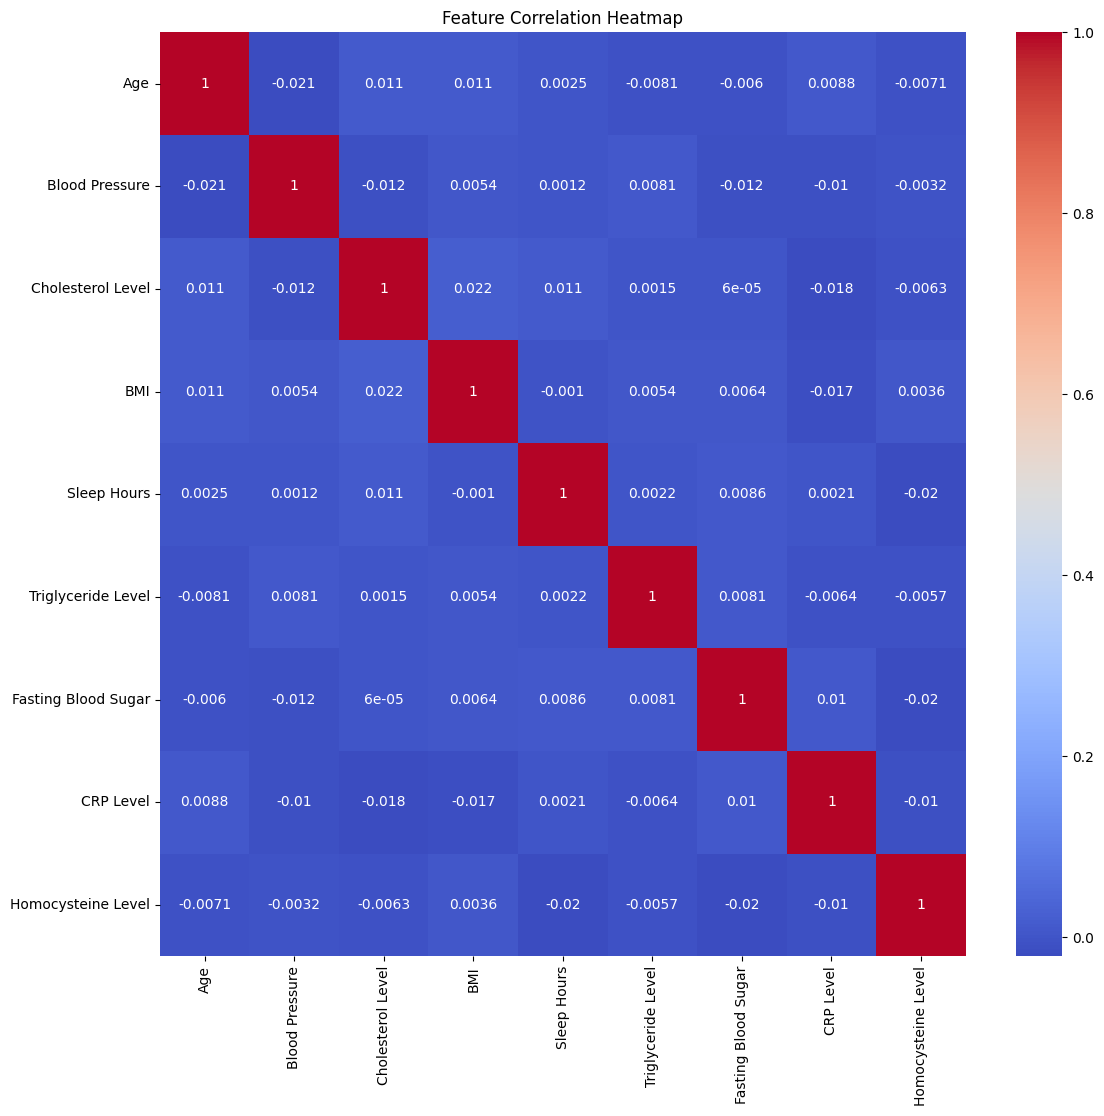

In [10]:
corr_matrix = df.select_dtypes(include=['number']).corr()
print("Correlation Matrix:\n", corr_matrix)
plt.figure(figsize=(13,12))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [13]:
df = df.dropna()

X = df.drop("Heart Disease Status", axis=1)
y = df["Heart Disease Status"]

X_encoded = pd.get_dummies(X, drop_first=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [14]:
model_l1 = LogisticRegression(penalty='l1', solver='saga', max_iter=5000)
model_l1.fit(X_train, y_train)

train_l1 = accuracy_score(y_train, model_l1.predict(X_train))
test_l1 = accuracy_score(y_test, model_l1.predict(X_test))

print(train_l1)
print(test_l1)


0.7979833716610649
0.7927864214992928


In [15]:
model_l2 = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=5000)
model_l2.fit(X_train, y_train)

train_l2 = accuracy_score(y_train, model_l2.predict(X_train))
test_l2 = accuracy_score(y_test, model_l2.predict(X_test))
print(train_l2)
print(test_l2)


0.7979833716610649
0.7927864214992928


In [16]:
model_en = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, max_iter=5000)
model_en.fit(X_train, y_train)

train_en = accuracy_score(y_train, model_en.predict(X_train))
test_en = accuracy_score(y_test, model_en.predict(X_test))
print(train_en)
print(test_en)


0.7979833716610649
0.7927864214992928


In [17]:
results = pd.DataFrame({
    "Penalty": ["L1","L2","ElasticNet"],
    "Train Accuracy":[train_l1, train_l2, train_en],
    "Test Accuracy":[test_l1, test_l2, test_en]
})

print(results)


      Penalty  Train Accuracy  Test Accuracy
0          L1        0.797983       0.792786
1          L2        0.797983       0.792786
2  ElasticNet        0.797983       0.792786


In [18]:
#Errors Encountered
#Solver lbfgs supports only l2 penalty
#elasticnet penalty requires saga solver

#Parameters Changed
#L1 required solver-> saga or liblinear
#L2 required solver-> many solvers
#ElasticNet required solver-> saga solvers and an extra parameter l1_ratio

#Relationship
#SAGA is the only solver that allows L1 + ElasticNet
#lbfgs/newton-cg only allow L2
#ElasticNet requires both L1 and L2 mixture, therefore l1_ratio must be set.


# Task 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target


In [2]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

solvers = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
results_list = []

In [3]:
for s in solvers:
    model = LogisticRegression(solver=s, max_iter=5000)
    model.fit(X_train, y_train)

    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))

    results_list.append([s, train_acc, test_acc])

In [4]:
df_task2_results = pd.DataFrame(
    results_list, 
    columns=["Solver", "Training Accuracy", "Testing Accuracy"]
)
print(df_task2_results)

            Solver  Training Accuracy  Testing Accuracy
0            lbfgs           0.975000          1.000000
1        liblinear           0.958333          1.000000
2        newton-cg           0.975000          1.000000
3  newton-cholesky           0.950000          0.966667
4              sag           0.975000          1.000000
5             saga           0.983333          1.000000


# Task 3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2]:
# Logistic Regression
lr_model = LogisticRegression(max_iter=5000)
lr_model.fit(X_train, y_train)
lr_train = accuracy_score(y_train, lr_model.predict(X_train))
lr_test = accuracy_score(y_test, lr_model.predict(X_test))

In [4]:
# Perceptron
perc = Perceptron(max_iter=2000)
perc.fit(X_train, y_train)
p_train = accuracy_score(y_train, perc.predict(X_train))
p_test = accuracy_score(y_test, perc.predict(X_test))

In [5]:
# Comparison Table
comparison = pd.DataFrame({
    "Model": ["Logistic Regression", "Perceptron"],
    "Training Accuracy": [lr_train, p_train],
    "Testing Accuracy": [lr_test, p_test]
})
print(comparison)

                 Model  Training Accuracy  Testing Accuracy
0  Logistic Regression           0.975000               1.0
1           Perceptron           0.716667               0.8


In [ ]:
#Logistic Regression     	Perceptron
# Probabilistic	             Non-probabilistic
# Uses sigmoid	             Uses step-function
# Minimizes log-loss	     Minimizes misclassification error
# Always converges	         May not converge
# Smooth decision boundary	 Hard margin boundary

# Task 4

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier,MLPRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
#import tensorflow as tf not working for pyhton 13.3


df = pd.read_csv("creditcard.csv")
print(df.head())
print(df.info())
print(df.isnull().sum())
print(df.describe())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [16]:
X = df.drop("Class", axis=1)
y = df["Class"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# MLP model similar to Keras architecture
#model = MLPClassifier(
 #   hidden_layer_sizes=(128, 64, 32),
  #  activation="relu",   # ReLU layers
   # solver="adam",
    #max_iter=500
#)
#sklearn MLPClassifier only allows *one* activation function for all layers.
#To replicate ReLU → Tanh → ReLU, we use 'relu' globally (most common), 
#but mention in report that sklearn cannot mix activations layer-wise.
#hidden_layer_sizes=(128,64,32) matches architecture exactly



In [17]:
layer1 = MLPRegressor(hidden_layer_sizes=(128,), activation='relu',
                      solver='adam', max_iter=50, random_state=0)
layer1.fit(X_train, X_train)

X_train_L1 = layer1.predict(X_train)
X_test_L1 = layer1.predict(X_test)


layer2 = MLPRegressor(hidden_layer_sizes=(64,), activation='tanh',
                      solver='adam', max_iter=50, random_state=0)
layer2.fit(X_train_L1, X_train_L1)

X_train_L2 = layer2.predict(X_train_L1)
X_test_L2 = layer2.predict(X_test_L1)


layer3 = MLPRegressor(hidden_layer_sizes=(32,), activation='relu',
                      solver='adam', max_iter=50, random_state=0)
layer3.fit(X_train_L2, X_train_L2)

X_train_L3 = layer3.predict(X_train_L2)
X_test_L3 = layer3.predict(X_test_L2)


In [ ]:
classifier = MLPClassifier(hidden_layer_sizes=(),
                           activation='sigmoid',
                           solver='adam',
                           max_iter=50)
classifier.fit(X_train_L3, y_train)

# Predict
y_pred = classifier.predict(X_test_L3)


In [20]:
acc  = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec  = recall_score(y_test, y_pred)
f1   = f1_score(y_test, y_pred)

print("MODEL PERFORMANCE:")
print("Accuracy: ", acc)
print("Precision: ", prec)
print("Recall: ", rec)
print("F1 Score: ", f1)


MODEL PERFORMANCE:
Accuracy:  0.9994382219725431
Precision:  0.9024390243902439
Recall:  0.7551020408163265
F1 Score:  0.8222222222222222


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.90      0.76      0.82        98

    accuracy                           1.00     56962
   macro avg       0.95      0.88      0.91     56962
weighted avg       1.00      1.00      1.00     56962



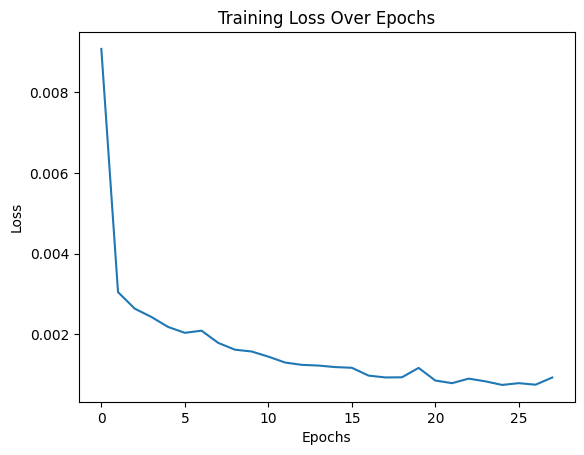

In [21]:
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

plt.plot(model.loss_curve_)
plt.title("Training Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report

# Load Fraud Dataset
fraud_df = pd.read_csv("fraud.csv")

X = fraud_df.drop("is_fraud", axis=1)
y = fraud_df["is_fraud"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# MLP Model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='tanh'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

history = model.fit(
    X_train, y_train,
    epochs=50,
    validation_split=0.2,
    verbose=1
)

# Evaluation
model.evaluate(X_test, y_test)

# Classification Report
y_pred = (model.predict(X_test) > 0.5).astype(int)
print(classification_report(y_test, y_pred))


# Task 5

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier,MLPRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
#import tensorflow as tf not working for pyhton 13.3

df1 = pd.read_csv("WineQT.csv")
print(df1.head())
print(df1.info())
print(df1.isnull().sum())
print(df1.describe())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

In [10]:
X1 = df1.drop("quality", axis=1)
y1 = df1["quality"]

scaler = StandardScaler()
X1_scaled = scaler.fit_transform(X1)

X1_train, X1_test, y1_train, y1_test = train_test_split(X1_scaled, y1, test_size=0.2, random_state=42)

In [11]:
mlp1 = MLPClassifier(
    hidden_layer_sizes=(128, 64, 32),   # three layers
    activation='relu',
    solver='adam',
    max_iter=500 #50 and 200, model were not converged
)

mlp1.fit(X1_train, y1_train)

y1_pred = mlp1.predict(X1_test)

print("DATASET 1 RESULTS:")
print("Accuracy :", accuracy_score(y1_test, y1_pred))
print("Precision (weighted):", precision_score(y1_test, y1_pred, average='weighted'))
print("Recall (weighted)   :", recall_score(y1_test, y1_pred, average='weighted'))
print("F1 Score (weighted) :", f1_score(y1_test, y1_pred, average='weighted'))
#weighted is used for multiclass data

DATASET 1 RESULTS:
Accuracy : 0.6462882096069869
Precision (weighted): 0.6277833840959964
Recall (weighted)   : 0.6462882096069869
F1 Score (weighted) : 0.6341109760726295


D:\python 3.13\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.69      0.75      0.72        96
           6       0.62      0.56      0.59        99
           7       0.62      0.81      0.70        26
           8       0.00      0.00      0.00         2

    accuracy                           0.65       229
   macro avg       0.39      0.42      0.40       229
weighted avg       0.63      0.65      0.63       229



D:\python 3.13\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\python 3.13\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\python 3.13\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


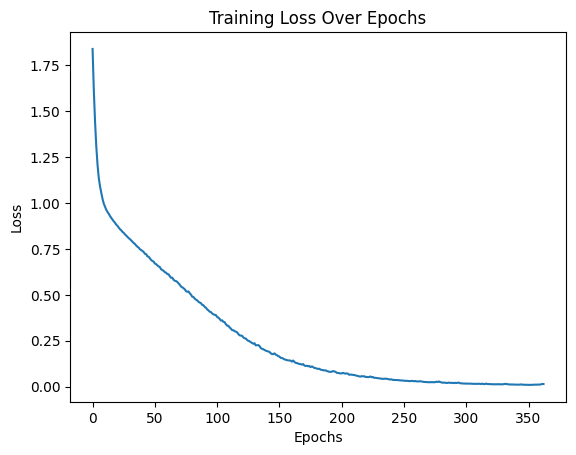

In [12]:
print("Classification Report:")
print(classification_report(y1_test, y1_pred))

plt.plot(mlp1.loss_curve_)
plt.title("Training Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [13]:
#data set 2
df2 = pd.read_csv("data.csv")
print(df2.head())
print(df2.info())
print(df2.isnull().sum())
print(df2.describe())

                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    str

In [18]:
df2 = pd.get_dummies(df2, drop_first=True)

X2 = df2.drop("price", axis=1)
y2 = df2["price"]

scaler = StandardScaler()
X2_scaled = scaler.fit_transform(X2)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2_scaled, y2, test_size=0.2, random_state=42)

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mlp2 = MLPRegressor(hidden_layer_sizes=(128,64,32),
                    activation='relu',
                    solver='adam',
                    max_iter=2000,
                    random_state=42)

mlp2.fit(X2_train, y2_train)

y2_pred = mlp2.predict(X2_test)

print("DATASET 2 RESULTS:")
print("R2 Score: ", r2_score(y2_test, y2_pred))
print("RMSE: ", mean_squared_error(y2_test, y2_pred, squared=False))
print("MAE: ", mean_absolute_error(y2_test, y2_pred))

DATASET 2 RESULTS:
R2 Score:  -0.20674917871164955
RMSE:  1109368.6192208675
MAE:  509069.13689684856


D:\python 3.13\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


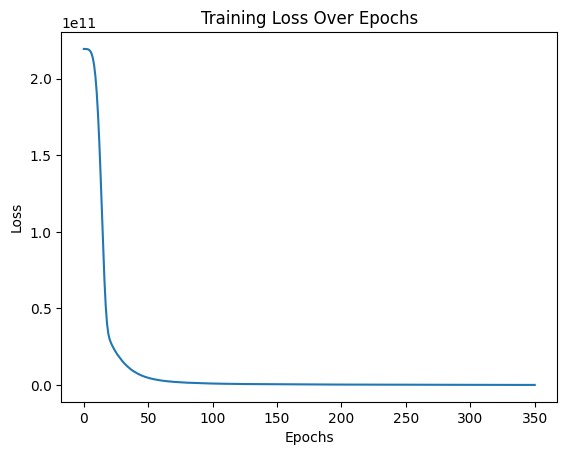

In [24]:
plt.plot(mlp2.loss_curve_)
plt.title("Training Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()